<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi, it's Sveta again. I will review this project as well.
    
    
I will use the same color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.

    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> looks like you did a great job. However, I cannot run the project because a local path is used there. Would you fix that?  
    
    

</div>

# Video Game Sales Data Analysis

This data analysis of video game sales data between regions provide insight on how a video game will sell in each region. We will look at how user ratings, critic ratings, and ESRB ratings affect sales. We will also look at games sales based on their genre, platform, and region.

+ Purpose: Identify patterns that determine whether a game succeeds or not.

+ Plan: Analyze data between 2012 and 2016 which includes the end of one platform generation's life and the transition to a new platform generation and make a prediction for 2017.

## Initialization

In [1]:
# Load the Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

## Load Data

In [2]:
# Read the data from the csv file
games = pd.read_csv('moved_games.csv')

## Prepare the Data

In [3]:
# Change the column names to lowercase
games.columns = games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Check for duplicates

In [4]:
print(games.duplicated().sum())

0


Since there are no duplicates, we can start cleaning and fixing the data.

In [5]:
# Create lists of unique values from columns
platforms = games['platform'].unique()
genres = games['genre'].unique()
ratings = games['rating'].unique()
user_scores = games['user_score'].unique()
critic_scores = games['critic_score'].unique()

#### Handle missing values

In [6]:
# Handle 'tbd' in the user_score column (change them to NaN)
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [7]:
# Fill in missing values in the 'critic_score' column with 0
games['critic_score'] = games['critic_score'].fillna(0)

# Fill in missing values for the rating column with 'Not Rated'
games['rating'] = games['rating'].fillna('Not Rated')

# Drop records with missing values in the name and genre columns
games = games.dropna(subset=['name', 'genre'])

# Fill missing values before converting.
games['year_of_release'] = games['year_of_release'].fillna(0)

For rating, I filled in missing values with "Not Rated". For numeric values, I decided to fill missing values for the ones I wanted to convert to int with 0. Since there is no 0 rating from the critic_score column and no record has year_of_release of 0, I can just exclude 0s from future calculations if necessary. I also converted 'tbd' values from 'user_score' to NaN with pd.to_numeric(). This made the 'user_score' column a float instead of an object for calculations.

It's possible that some games were just not rated by the users or critics. Games do not have to be rated by the ESRB, but in order for stores to sell them or console manufacturers to allow games for their consoles, they have to be rated by the ESRB. Therefore, not all games have ratings. Year of release may also be unknown.

#### Convert column types where necessary

In [8]:
# Release year does not make sense to have decimal points as years don't have decimals, 
# so it has to be converted from float to int.
# Convert the 'year_of_release' column from float to int. 
if np.array_equal(games['year_of_release'], games['year_of_release'].astype('int')):
    games['year_of_release'] = games['year_of_release'].astype(int)

# Critic score seems to be integers between 1 and 100.
# Convert the 'critic_score' column from float to int.
if np.array_equal(games['critic_score'], games['critic_score'].astype('int')):
    games['critic_score'] = games['critic_score'].astype(int)

games.info()
display(games.sample(5))

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


name platform  year_of_release       genre  na_sales  \
2107             Dead Space 3     X360             2013      Action      0.64   
6121            Viewtiful Joe      PS2             2004      Action      0.14   
10159                 NCIS 3D      3DS             2011   Adventure      0.06   
12767  The Sims 2: University       PC             2005  Simulation      0.01   
3956          Chopper Command     2600             1982     Shooter      0.47   

       eu_sales  jp_sales  other_sales  critic_score  user_score     rating  
2107       0.26       0.0         0.08            78         6.4          M  
6121       0.11       0.0         0.04            90         8.5          T  
10159      0.04       0.0         0.01             0         NaN          T  
12767      0.04       0.0         0.01            81         7.8          T  
3956       0.03       0.0         0.01             0         NaN  Not Rated

#### Calculate the total sales for each game and put them in a separate column

In [9]:
# Calculate the total sales for each game
games['total_sales'] = (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + 
                      games['other_sales'])

## Data Analysis

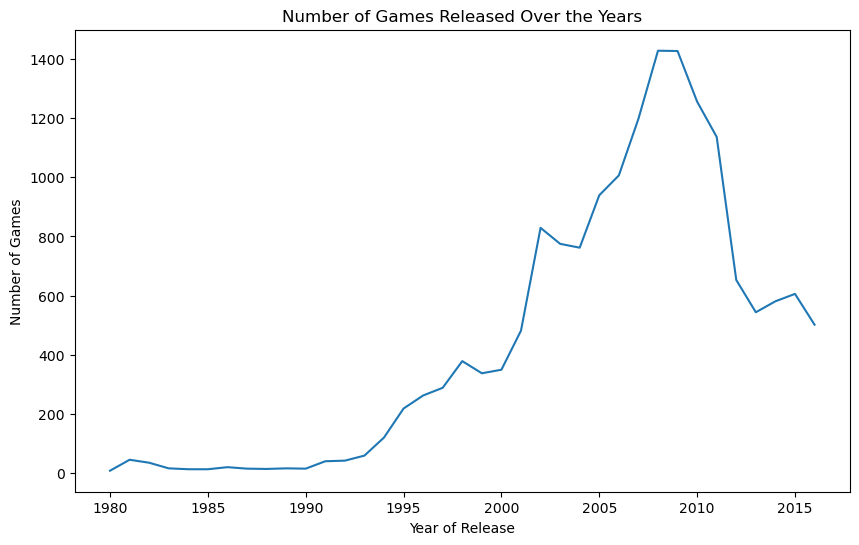

In [10]:
# Count the number of games released in different years
games = games[games['year_of_release'] != 0]
games_per_year = games['year_of_release'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(games_per_year.index, games_per_year.values)

# Add title and labels
plt.title('Number of Games Released Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')

# Show the plot
plt.show()

Based on this chart, we can see the release of games have almost an exponential increase year after year until about 2009. The number of games released then significantly dropped.

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


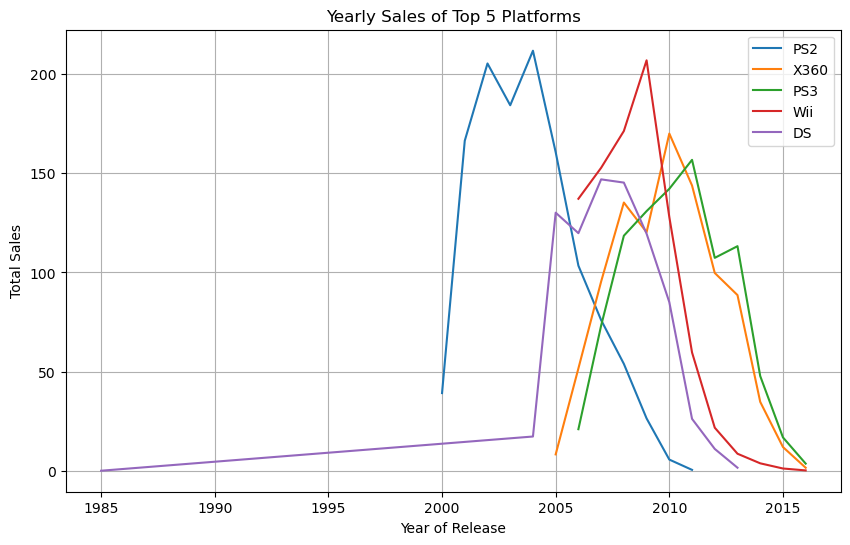

In [11]:
# Group the data by platform and sum the sales
platform_sales = games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Calculate total sales for each platform
platform_sales['total_sales'] = platform_sales.sum(axis=1)

# Display the platforms with the greatest total sales
top_platforms = platform_sales['total_sales'].sort_values(ascending=False)
print(top_platforms)

# Get the top 5 platforms
top_5_platforms = top_platforms.index[:5]

# Filter the data for the top 5 platforms
top_platforms_data = games[games['platform'].isin(top_5_platforms)]

# Group by year and platform and sum the sales
yearly_sales = top_platforms_data.groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Calculate total sales for each year
yearly_sales['total_sales'] = yearly_sales.sum(axis=1)

# Reset the index for plotting
yearly_sales_reset = yearly_sales.reset_index()

# Plot the distribution of sales for each year for the top 5 platforms
plt.figure(figsize=(10, 6))
for platform in top_5_platforms:
    platform_data = games[games['platform'] == platform]
    yearly_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform)

plt.title('Yearly Sales of Top 5 Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

It can be said that the top 5 platforms when it comes to sales were from the period between 2005 and 2015. They all peaked around 2010 and then declined. All the games for these consoles have nearly 0 in sales in the last year of the data. Looking at the chart, it appears they are generally around for about 10 years.

In [12]:
# Find the year of the first and last game released for each platform
platform_lifespan = games.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Calculate the lifespan of each platform
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']

print(platform_lifespan)

           min   max  lifespan
platform                      
2600      1980  1989         9
3DO       1994  1995         1
3DS       2011  2016         5
DC        1998  2008        10
DS        1985  2013        28
GB        1988  2001        13
GBA       2000  2007         7
GC        2001  2007         6
GEN       1990  1994         4
GG        1992  1992         0
N64       1996  2002         6
NES       1983  1994        11
NG        1993  1996         3
PC        1985  2016        31
PCFX      1996  1996         0
PS        1994  2003         9
PS2       2000  2011        11
PS3       2006  2016        10
PS4       2013  2016         3
PSP       2004  2015        11
PSV       2011  2016         5
SAT       1994  1999         5
SCD       1993  1994         1
SNES      1990  1999         9
TG16      1995  1995         0
WS        1999  2001         2
Wii       2006  2016        10
WiiU      2012  2016         4
X360      2005  2016        11
XB        2000  2008         8
XOne    

In [13]:
# Create a dataframe that only includes games released between 2012 and 2016
games_filtered = games[(games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]

#### Let's look at the data from 2012 to the last year of the data that we have, which is 2016. These are the consoles that are the latest generation at the time.

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64


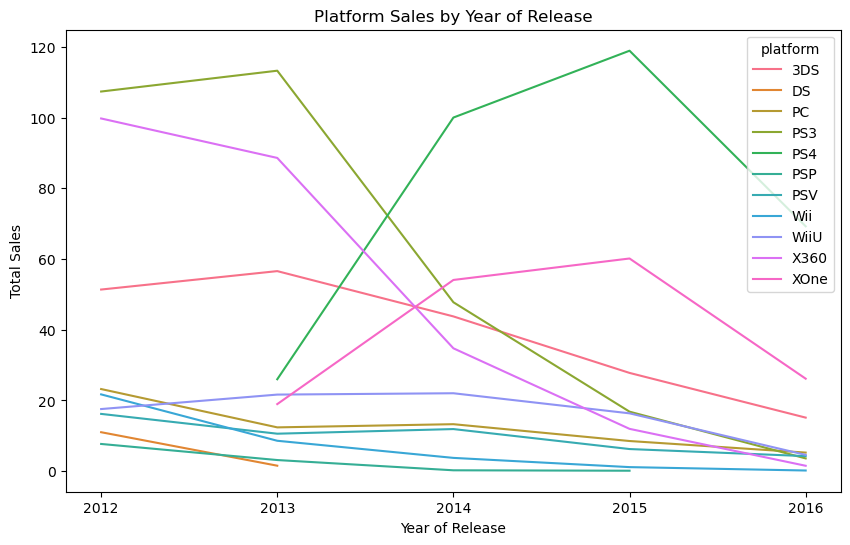

In [14]:
# Group the data by platform and sum the total sales
platform_sales = games_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Display the platforms leading in sales
print(platform_sales)

# Group the data by platform and year_of_release, and sum the total_sales
platform_yearly_sales = games_filtered.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Create a line plot of total sales by year_of_release for each platform
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=platform_yearly_sales, x='year_of_release', y='total_sales', hue='platform')

plt.title('Platform Sales by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
ax.xaxis.set_ticks(np.arange(2012, 2017, 1))
plt.show()


PS4, PS3, and Xbox 360 were leading in sales at this period. The previous generation (which includes PS3, Xbox 360, and Wii) were shrinking, while the current generation at the time (PS4 and Xbox One) went up 2014 and 2015, but was lower in 2016.

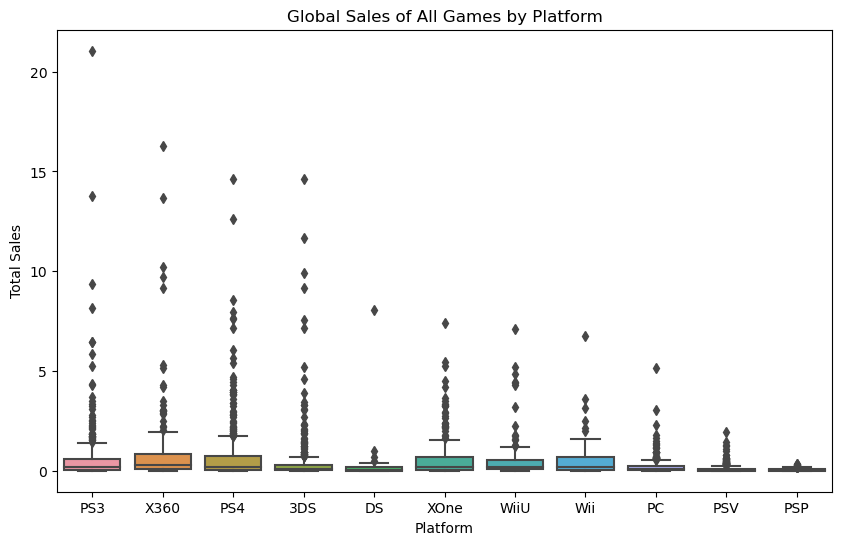

In [15]:
# Create a box plot of global sales by platform
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=games_filtered)
plt.title('Global Sales of All Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

Between 2012 and 2016, the previous generation of platforms are still pretty popular and their sales are still strong, while the transition to the new generation took place on 2014. The average sales seem to be the same between new and old platforms.

In [16]:
# Filter out games that have no critic score
games_filtered = games_filtered[games_filtered['critic_score'] != 0]

Games that have no critic scores were removed from the analysis from this point.

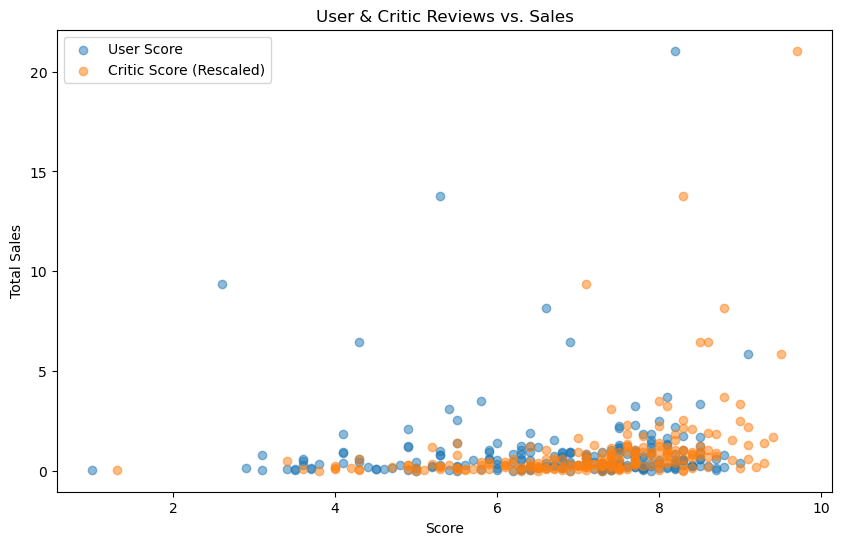

                       critic_score_rescaled  user_score  total_sales
critic_score_rescaled               1.000000    0.539456     0.331497
user_score                          0.539456    1.000000     0.003227
total_sales                         0.331497    0.003227     1.000000


In [17]:
# Specify PS3 as the platform
platform_data = games_filtered[games_filtered['platform'] == 'PS3'].copy()

# Rescale critic scores so they can be comparable to user scores
platform_data['critic_score_rescaled'] = platform_data['critic_score'] / 10

plt.figure(figsize=(10, 6))

# Scatter plot for user_score
plt.scatter(platform_data['user_score'], platform_data['total_sales'], alpha=0.5, label='User Score')

# Scatter plot for rescaled critic_score
plt.scatter(platform_data['critic_score_rescaled'], platform_data['total_sales'], alpha=0.5, label='Critic Score (Rescaled)')

plt.title('User & Critic Reviews vs. Sales')
plt.xlabel('Score')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Calculate the correlation between rescaled critic scores, user scores, and total sales
correlation = platform_data[['critic_score_rescaled', 'user_score', 'total_sales']].corr()

print(correlation)

Critic scores are rescaled so that they are visually comparable to user scores.

It looks like there is no significant correlation between either score and the total sales for a game on the Playstation 3 console. 

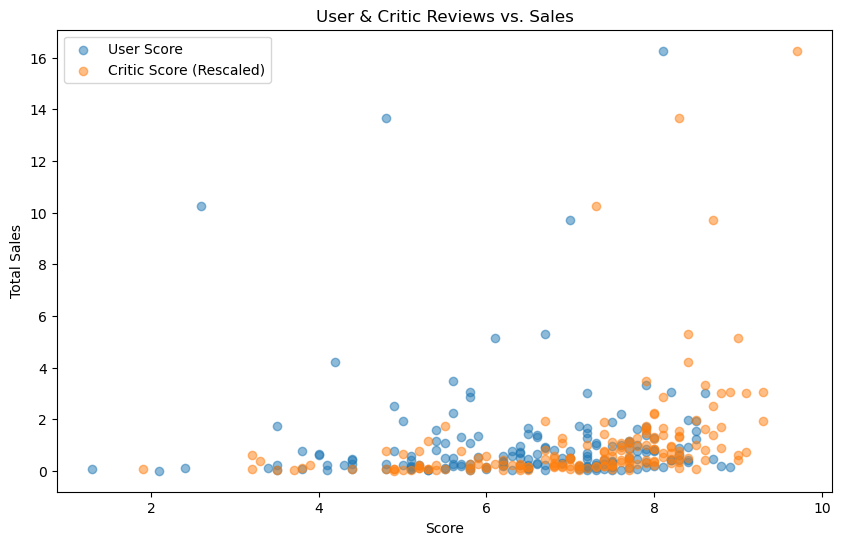

              critic_score  user_score  total_sales
critic_score      1.000000    0.557352     0.360573
user_score        0.557352    1.000000    -0.002014
total_sales       0.360573   -0.002014     1.000000


In [18]:
# Filter the data for a popular platform
platform_data = games_filtered[games_filtered['platform'] == 'X360'].copy()

# Rescale critic scores
platform_data['critic_score_rescaled'] = platform_data['critic_score'] / 10

plt.figure(figsize=(10, 6))

# Scatter plot for user_score
plt.scatter(platform_data['user_score'], platform_data['total_sales'], alpha=0.5, label='User Score')

# Scatter plot for critic_score
plt.scatter(platform_data['critic_score_rescaled'], platform_data['total_sales'], alpha=0.5, label='Critic Score (Rescaled)')

plt.title('User & Critic Reviews vs. Sales')
plt.xlabel('Score')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Calculate the correlation between rescaled critic scores, user scores, and total sales
correlation = platform_data[['critic_score', 'user_score', 'total_sales']].corr()

print(correlation)

It looks like there is no correlation between user or critic reviews and total sales for a game on the Xbox 360 platform. 

In [19]:
# Group the data by game name and count the unique platforms for each game
games_on_multiple_platforms = games_filtered.groupby('name')['platform'].nunique()

# Filter for games that are on more than one platform
games_on_multiple_platforms = games_on_multiple_platforms[games_on_multiple_platforms > 1]

print(games_on_multiple_platforms)

name
2014 FIFA World Cup Brazil                            2
7 Days to Die                                         2
Adventure Time: The Secret of the Nameless Kingdom    2
Agatha Christie's The ABC Murders                     2
Alien: Isolation                                      3
                                                     ..
Yaiba: Ninja Gaiden Z                                 2
Zero Escape: Zero Time Dilemma                        2
Zombie Army Trilogy                                   2
Zone of the Enders HD Collection                      2
[Prototype 2]                                         3
Name: platform, Length: 342, dtype: int64


In [20]:
# Choose a game
game_name = '[Prototype 2]'

# Get data for the chosen game across all platforms
game_data = games_filtered[games_filtered['name'] == game_name]

# Compare the sales of the game on different platforms
print(game_data[['platform', 'total_sales']])

      platform  total_sales
2592      X360         0.79
2760       PS3         0.74
10315       PC         0.11


It looks like the same game could be similar in sales between the two competing platforms (PS3 and Xbox 360). PC seems to be selling less in all years according to an earlier chart.

In [21]:
# Group the data by genre and sum the total sales
genre_sales = games_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Display the total sales by genre
print(genre_sales)

genre
Action          330.08
Shooter         241.68
Sports          140.10
Role-Playing     91.80
Platform         49.58
Racing           41.76
Misc             37.94
Fighting         26.28
Simulation       24.93
Adventure        11.78
Strategy          9.43
Puzzle            3.14
Name: total_sales, dtype: float64


Action, shooter, and sports games are significantly more profitable than other genres. It looks like the games that are the most immersive or requires the player to do more physically (action and shooter, for example, may require more movement and quick hand-eye coordination and dexterity), while strategy and puzzle games which require more thought and reasoning before each move have the lowest sales.

#### Platforms by Sales in each region

In [22]:
# Top five platforms for each region
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_platforms = games_filtered.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    print(f"Top 5 platforms in {region}:\n{top_platforms}\n")

Top 5 platforms in na_sales:
platform
X360    106.99
PS4      84.50
PS3      77.11
XOne     76.11
WiiU     30.78
Name: na_sales, dtype: float64

Top 5 platforms in eu_sales:
platform
PS4     112.56
PS3      78.50
X360     57.15
XOne     42.33
PC       33.76
Name: eu_sales, dtype: float64

Top 5 platforms in jp_sales:
platform
3DS     26.60
PS3     20.38
WiiU    10.17
PS4      9.46
PSV      7.05
Name: jp_sales, dtype: float64



In North America, people prefer the Xbox, which is an American product. In Europe, people bought games for the PlayStation 3 and 4 more than they bought for the Xbox 360 and Xbox One. In Japan, it seems like Nintendo 3DS is their choice.

In [23]:
# Top five genres for each region
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_genres = games_filtered.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    print(f"Top 5 genres in {region}:\n{top_genres}\n")

Top 5 genres in na_sales:
genre
Action          139.86
Shooter         115.79
Sports           65.85
Role-Playing     36.76
Platform         20.48
Name: na_sales, dtype: float64

Top 5 genres in eu_sales:
genre
Action          128.01
Shooter          89.26
Sports           53.82
Role-Playing     28.34
Racing           20.99
Name: eu_sales, dtype: float64

Top 5 genres in jp_sales:
genre
Action          20.92
Role-Playing    17.52
Platform         7.96
Shooter          7.62
Simulation       7.35
Name: jp_sales, dtype: float64



Action is the most popular genre amongst all the regions. Shooters are the second most popular for North America and Europe, but not Japan, which favor Role-Playing games over shooter. Sports isn't even on the top five for Japan, while it's the third most popular genre in North America and Europe.

In [24]:
# ESRB ratings and sales in each region
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    esrb_sales = games_filtered.groupby('rating')[region].sum().sort_values(ascending=False)
    print(f"ESRB ratings and sales in {region}:\n{esrb_sales}\n")

ESRB ratings and sales in na_sales:
rating
M            217.69
E             99.23
T             61.32
E10+          58.58
Not Rated      1.08
Name: na_sales, dtype: float64

ESRB ratings and sales in eu_sales:
rating
M            183.82
E             97.58
T             49.86
E10+          41.72
Not Rated      3.56
Name: eu_sales, dtype: float64

ESRB ratings and sales in jp_sales:
rating
E            26.79
T            21.86
M            20.02
E10+          8.01
Not Rated     0.26
Name: jp_sales, dtype: float64



It seems the more mature the rating is, the higher the sales of the game in North America and Europe. In Japan, however, if the rating is "Everyone" then it has a higher sales. It could be because of culture.

## Testing Hypotheses
- Null hypothesis (H0): The average user ratings of the Xbox One and PC platforms are the same.
- Alternative hypothesis (H1): The average user ratings of the Xbox One and PC platforms are not the same.

In [25]:
# Filter the data for Xbox One and PC platforms
xbox_one_ratings = games_filtered[games_filtered['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = games_filtered[games_filtered['platform'] == 'PC']['user_score'].dropna()

# Perform t-test
result = stats.ttest_ind(xbox_one_ratings, pc_ratings)

# Print the p-value
print('p-value:', result.pvalue)

p-value: 0.5991315923632393


We can set the alpha threshold value (significance level) to 0.05.

Since the p-value is greater than 0.05, we do not reject the null hypothesis and conclude that there is no significant difference between the Xbox One and PC user ratings. 

- Null hypothesis (H0): The average user ratings for the Action and Sports genres are the same.
- Alternative hypothesis (H1): The average user ratings for the Action and Sports genres are different.

In [26]:
# Filter the data for Action and Sports genres
action_ratings = games_filtered[games_filtered['genre'] == 'Action']['user_score'].dropna()
sports_ratings = games_filtered[games_filtered['genre'] == 'Sports']['user_score'].dropna()

# Perform t-test
result = stats.ttest_ind(action_ratings, sports_ratings)

# Print the p-value
print('p-value:', result.pvalue)

p-value: 9.13633279873618e-16


We can set the alpha threshold value (significance level) to 0.05.

Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in the average user ratings between action and sport genres of games. 

## Conclusion

Looking at the data between 2012 and 2016 where it is one year before the new consoles came out, it still took about a year before the sales flipped from the previous generation to the new generation of platforms. There are no significant correlation between user or critic scores with the sales of games. Games that require quick hand-eye coordination are more popular than those that require thinking before doing. North American sales and European sales tend to be similar, but different from Japan sales when it comes to genre (except for Action games) and platform. The average user ratings between Xbox One and PC are the same, while the average user ratings between action and sports games are different.

Looking at the data, we can expect that Action and Shooter games for the new generation (PS4 and Xbox One) will perform the best when it comes to sales in North America and Europe, while Action and Role-Playing for the same platforms will perform well in Japan.